In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/travel-insurance/travel insurance.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [3]:
df=pd.read_csv('/kaggle/input/travel-insurance/travel insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.shape

(63326, 11)

In [5]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision             63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df.isnull().sum()

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision                   0
Gender                  45107
Age                         0
dtype: int64

In [8]:
df=df.drop(['Gender'],axis=1)
df.head()
#we remove gender coz there are many null values

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Net_Sales'}>],
       [<AxesSubplot:title={'center':'Commision'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

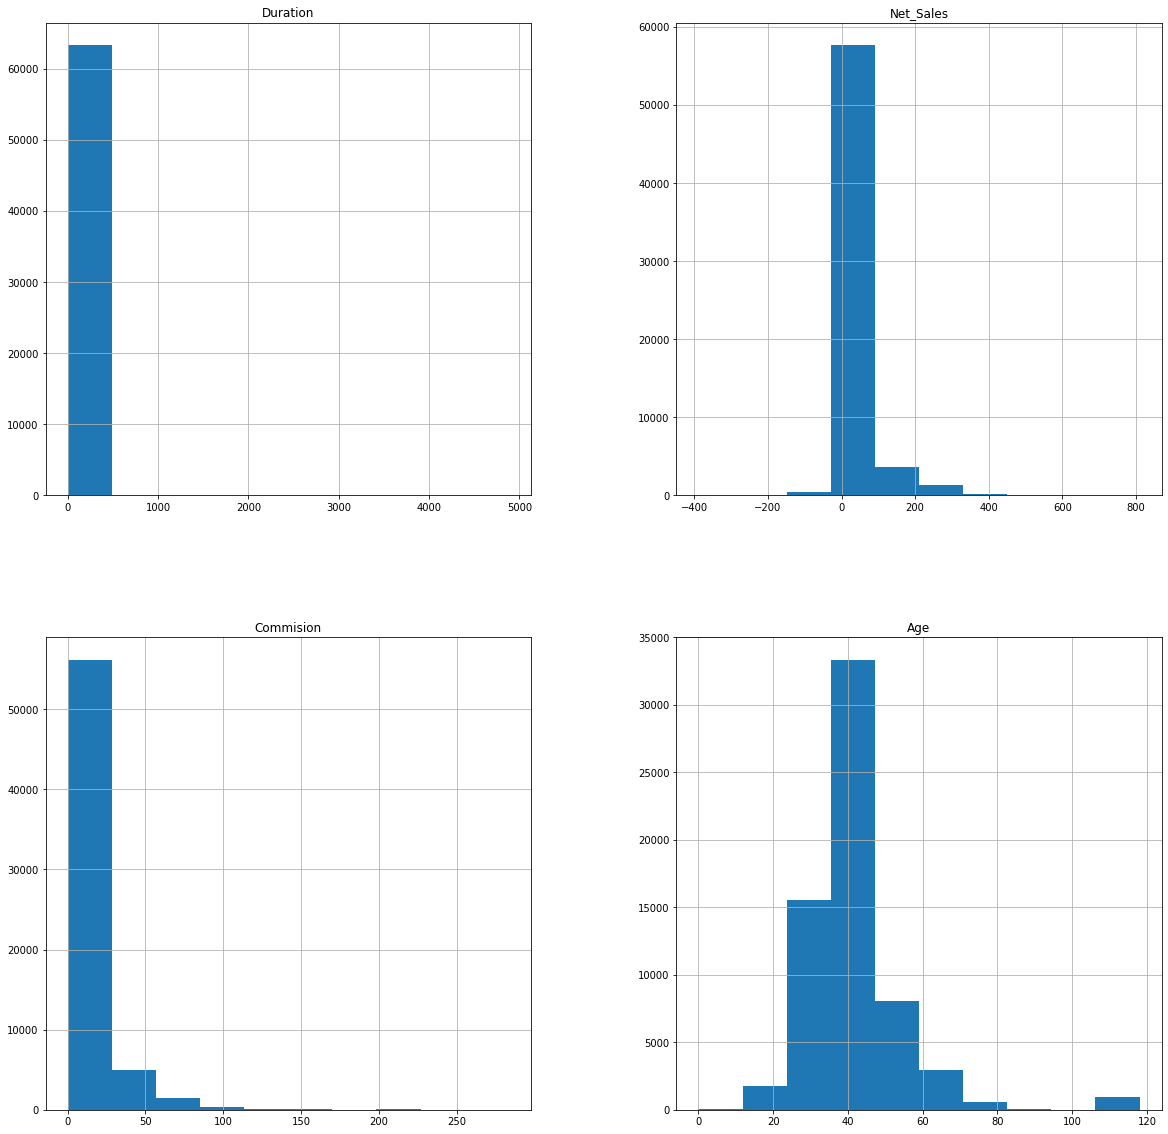

In [9]:
df.hist(figsize=(20,20))

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Agency']=le.fit_transform(df['Agency'])
df['Agency_Type']= le.fit_transform(df['Agency_Type'])
df['Distribution_Channel']= le.fit_transform(df['Distribution_Channel'])
df['Product_Name']= le.fit_transform(df['Product_Name'])
df['Claim']= le.fit_transform(df['Claim'])
df['Destination']= le.fit_transform(df['Destination'])

<AxesSubplot:ylabel='Claim'>

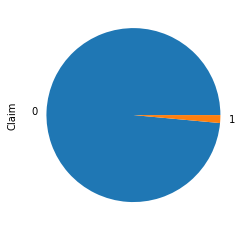

In [11]:
df.Claim.value_counts().plot(kind='pie')

In [12]:
col=["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision","Age","Claim"]
df=df.reindex(columns=col)

<AxesSubplot:>

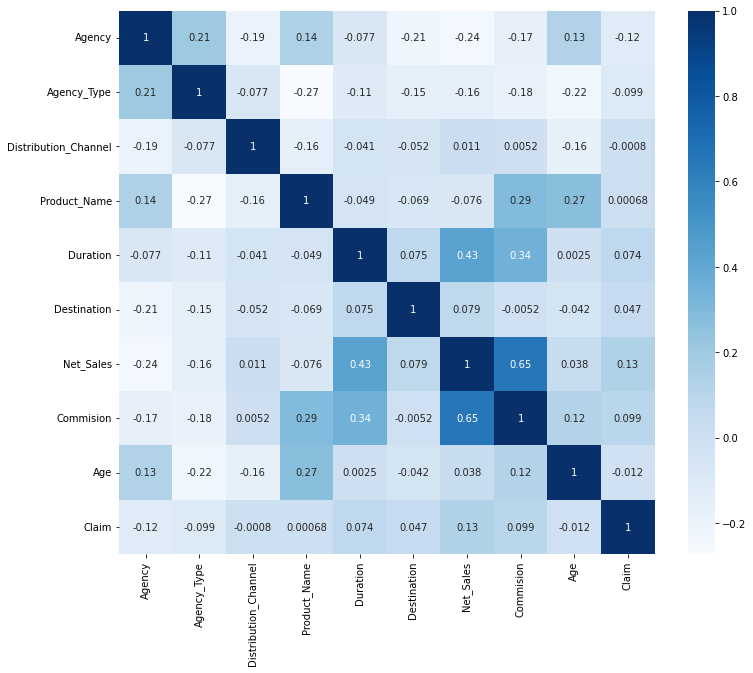

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
#all values are less than 0.7 so we dont do anything

In [14]:
y=df.iloc[:,[-1]]
x=df.drop("Claim",axis=1)

In [15]:
x

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,3,1,0,12,186,79,-29.0,9.57,81
1,3,1,0,12,186,79,-29.0,9.57,71
2,6,1,1,16,65,4,-49.5,29.70,32
3,6,1,1,16,60,4,-39.6,23.76,32
4,6,1,1,16,79,61,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...
63321,9,0,1,8,111,63,35.0,12.25,31
63322,9,0,1,8,58,26,40.0,14.00,40
63323,9,0,1,8,2,79,18.0,6.30,57
63324,9,0,1,8,3,145,18.0,6.30,63


In [16]:
y

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
63321,0
63322,0
63323,0
63324,0


<AxesSubplot:ylabel='None'>

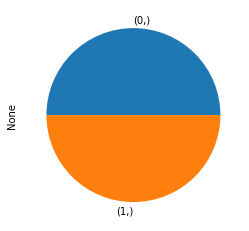

In [17]:
sm = SMOTE(random_state=42)
xsm, ysm = sm.fit_resample(x, y)
ysm.value_counts().plot(kind='pie')

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xn=pd.DataFrame()
col=xsm.columns
xn[col]=mms.fit_transform(xsm[col])
xn.head()


,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,0.2,1.0,0.0,0.48,0.038501,0.533784,0.300250,0.033757,0.686441
1,0.2,1.0,0.0,0.48,0.038501,0.533784,0.300250,0.033757,0.601695
2,0.4,1.0,1.0,0.64,0.013721,0.027027,0.283153,0.104762,0.271186
3,0.4,1.0,1.0,0.64,0.012697,0.027027,0.291410,0.083810,0.271186
4,0.4,1.0,1.0,0.64,0.016588,0.412162,0.307923,0.041905,0.347458


In [19]:
xt,xtest,yt,ytest=train_test_split(xn,ysm,test_size=0.25,random_state=42)

In [20]:
mod=RandomForestClassifier(random_state=42)
mod.fit(xt,yt)
pred=mod.predict(xtest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [21]:
print(accuracy_score(ytest,pred))

0.9724679487179487


In [22]:
mod.score(xt,yt)

0.9942947498878181

In [23]:
mod.score(xtest,ytest)

0.9724679487179487

<AxesSubplot:>

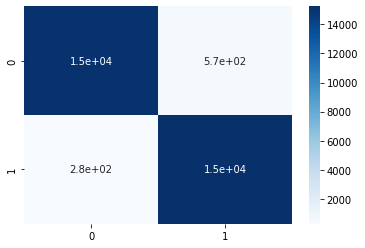

In [24]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True,cmap='Blues')

In [25]:
f1_score(ytest,pred,average='micro')

0.9724679487179487